# MNIST Classification Using *Convolutional Neural Network*
---
- Author: Vladimir Shapiro, adopted from Diego Inácio's
- Notebook: [MNIST_classification.ipynb](https://github.com/diegoinacio/computer-vision-notebooks/blob/master/Computer-Vision-Experiments/MNIST_classification.ipynb)
---
Digit classification using *Convolutional Neural Network*.

In [20]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tensorflow import keras
import tensorflow as tf

## Read the dataset
---

In [21]:
mnist = tf.keras.datasets.mnist
[X_train, Y_train],[X_test, Y_test] = mnist.load_data()
X_train = X_train[..., None]
X_test = X_test[..., None]

# one hot for multi-class classification
# MNIST = 10 classes [0-9]
Y_train_oh = np.zeros((Y_train.size, 10))
Y_train_oh[np.arange(Y_train.size), Y_train] = 1
Y_test_oh = np.zeros((Y_test.size, 10))
Y_test_oh[np.arange(Y_test.size), Y_test] = 1

print('X_train:', X_train.shape)
print('Y_train:', Y_train.shape)
print('Y_train_oh:', Y_train_oh.shape)
print('X_test:', X_test.shape)
print('Y_test:', Y_test.shape)
print('Y_test_oh:', Y_test_oh.shape)

X_train: (60000, 28, 28, 1)
Y_train: (60000,)
Y_train_oh: (60000, 10)
X_test: (10000, 28, 28, 1)
Y_test: (10000,)
Y_test_oh: (10000, 10)


Display several randomly selected handwritten digits to provide a raw impression how the digits look like.

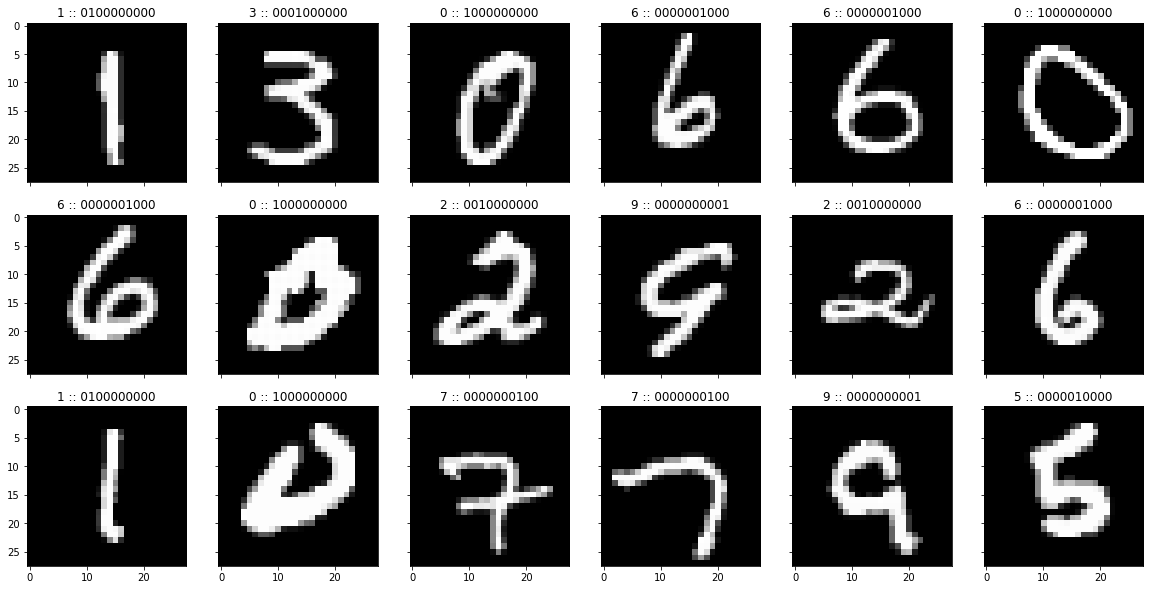

In [22]:
plt.rcParams['figure.figsize'] = (20, 10)
fig, AX = plt.subplots(3, 6, sharex=True, sharey=True)

np.random.seed(1234)
for ax in AX.ravel():
    rindex = np.random.randint(Y_train.size)
    img_show = X_train[rindex][...,0]
    ax.imshow(img_show, cmap='gray')
    # title label + one-hot
    title = f'{Y_train[rindex]} :: '
    title += ''.join([str(int(e)) for e in Y_train_oh[rindex]]) 
    ax.set_title(title)
plt.grid(False)

## Transform dataset
---

To a format suitable for the training and predictions later on. A separate *X_test* dataset is allocated.

In [23]:
# Change dtype to float32
X_train = X_train.astype(np.float32)
Y_train = Y_train.astype(np.float32)
X_test = X_test.astype(np.float32)
Y_test = Y_test.astype(np.float32)

# Change axes and normalization
X_train, Y_train = X_train/255, Y_train.reshape(-1, 1)
X_test, Y_test = X_test/255, Y_test.reshape(-1, 1)

# reshape Xs
x_train = X_train.reshape(-1, 28*28)
x_test = X_test.reshape(-1, 28*28)

print('X_train:', X_train.shape)
print('x_train:', x_train.shape)
print('Y_train:', Y_train.shape)
print('Y_train_oh:', Y_train_oh.shape)
print('X_test:', X_test.shape)
print('x_test:', x_test.shape)
print('Y_test:', Y_test.shape)
print('Y_test_oh:', Y_test_oh.shape)

X_train: (60000, 28, 28, 1)
x_train: (60000, 784)
Y_train: (60000, 1)
Y_train_oh: (60000, 10)
X_test: (10000, 28, 28, 1)
x_test: (10000, 784)
Y_test: (10000, 1)
Y_test_oh: (10000, 10)


# Classification using *Convolutional Neural Network (CNN)*
---

## Training

Create Keras' Sequential CNN model, which is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

First, define the *structure* or *architecture* of the CNN model:

In [24]:
# Get dimensions
N1, N2, C = X_train[0].shape

# Model
modelCNN = tf.keras.Sequential([
    tf.keras.layers.Input(X_train[0].shape),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(N1*N2, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

modelCNN.summary() # Display the structure

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               7226128   
_________________________________________________________________
dropout_3 (Dropout)          (None, 784)              

Now, *build* the actual model, that is allocate computer memory, connections, hyperparameters, etc. per definitions above.

In [25]:
modelCNN.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

Begin the CNN training for a given number of epochs. 
    
    Tip: Training on a conventional CPU is significantly slower than on GPU/TPU. To request that go to "Runtime" -> "Change Runtime Type" and select "GPU" from the dropdown list prior to running the script.

In [26]:
NUMBER_OF_EPOCHS = 10
modelCNN.fit(X_train, Y_train_oh, epochs=NUMBER_OF_EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2392 - accuracy: 0.9225
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0493 - accuracy: 0.9842
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0342 - accuracy: 0.9890
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0243 - accuracy: 0.9915
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0192 - accuracy: 0.9937
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0156 - accuracy: 0.9946
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0171 - accuracy: 0.9941
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0112 - accuracy: 0.9965
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0115 - accuracy: 0.9963
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.009

## Testing

Now, we have the trained model and can do predictions.

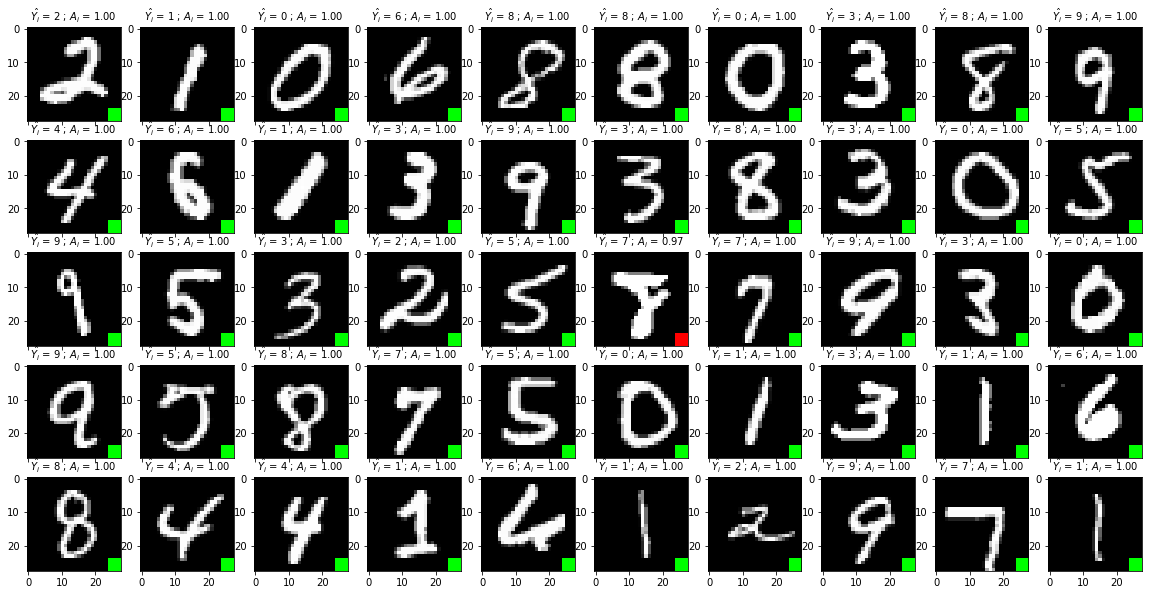

In [27]:
fig, AX = plt.subplots(5, 10, sharex=True)
AX = [b for a in AX for b in a]

prediction_on_test = modelCNN.predict(X_test)

np.random.seed(1234)
for ax in AX:
    index = np.random.randint(Y_test.size)
    # Predict
    A_ = prediction_on_test[index]
    Y_ = np.argmax(A_)
    # Prepare image to show
    img_show = np.ones((N1, N2, 3))
    img_show *= X_test[index]
    # Green square: classified correctly
    # Red square: classified wrongly
    if Y_ == Y_test[index]:
        img_show[-4:, -4:] = (0, 1, 0)
    else:
        img_show[-4:, -4:] = (1, 0, 0)
    ax.imshow(img_show)
    ax.set_title(r'$\hat{Y_i}$ = ' + str(Y_) + r' ; $A_i$ = {:.02f}'.format(float(A_[Y_])), fontsize=10)

Calculate a validation metric as:

In [28]:
print('Validation')
#prediction_on_test = modelCNN.predict(X_test)
print('Test:', np.sum((Y_test_oh - prediction_on_test)**2, axis=1).mean())

prediction_on_train = modelCNN.predict(X_train)
print('Train:', np.sum((Y_train_oh - prediction_on_train)**2, axis=1).mean())

Validation
Test: 0.01389552908667439
Train: 0.0007565495083416837


3.Change the number of training epochs, get new validation results and reflect on them with the original number of epochs.

**NUMBER_OF_EPOCHS = 15**

In [29]:
NUMBER_OF_EPOCHS = 15
modelCNN.fit(X_train, Y_train_oh, epochs=NUMBER_OF_EPOCHS)

Epoch 1/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0107 - accuracy: 0.9963
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0092 - accuracy: 0.9971
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0105 - accuracy: 0.9965
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0079 - accuracy: 0.9976
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0082 - accuracy: 0.9975
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0084 - accuracy: 0.9975
Epoch 7/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0084 - accuracy: 0.9974
Epoch 8/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0084 - accuracy: 0.9976
Epoch 9/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0065 - accuracy: 0.9981
Epoch 10/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.007

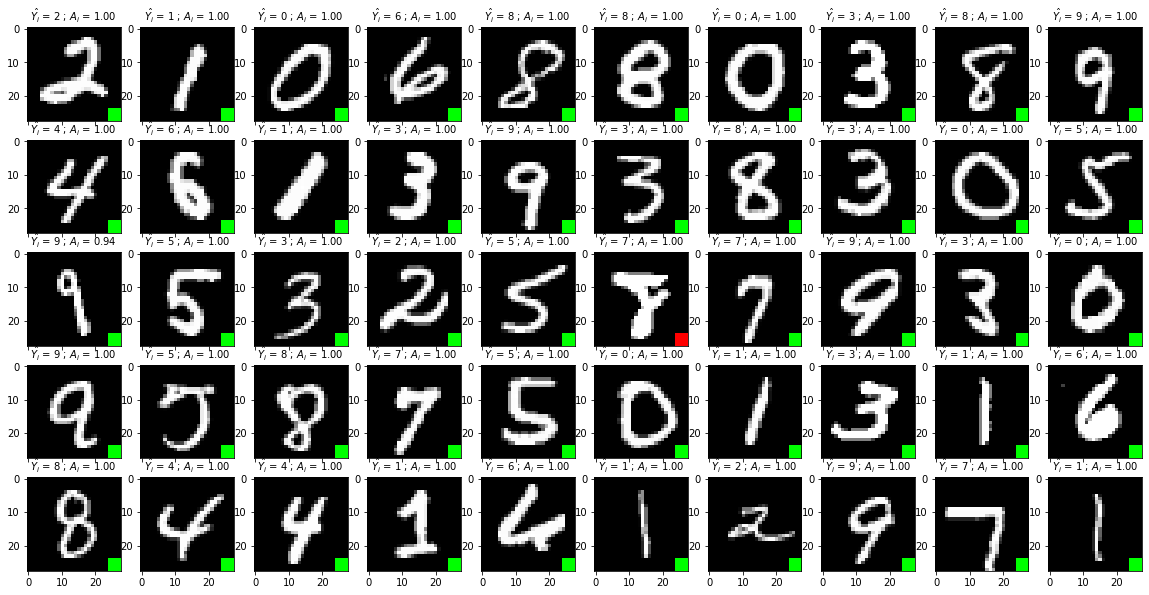

In [30]:
fig, AX = plt.subplots(5, 10, sharex=True)
AX = [b for a in AX for b in a]

prediction_on_test = modelCNN.predict(X_test)

np.random.seed(1234)
for ax in AX:
    index = np.random.randint(Y_test.size)
    # Predict
    A_ = prediction_on_test[index]
    Y_ = np.argmax(A_)
    # Prepare image to show
    img_show = np.ones((N1, N2, 3))
    img_show *= X_test[index]
    # Green square: classified correctly
    # Red square: classified wrongly
    if Y_ == Y_test[index]:
        img_show[-4:, -4:] = (0, 1, 0)
    else:
        img_show[-4:, -4:] = (1, 0, 0)
    ax.imshow(img_show)
    ax.set_title(r'$\hat{Y_i}$ = ' + str(Y_) + r' ; $A_i$ = {:.02f}'.format(float(A_[Y_])), fontsize=10)

In [31]:
print('Validation')
#prediction_on_test = modelCNN.predict(X_test)
print('Test:', np.sum((Y_test_oh - prediction_on_test)**2, axis=1).mean())

prediction_on_train = modelCNN.predict(X_train)
print('Train:', np.sum((Y_train_oh - prediction_on_train)**2, axis=1).mean())

Validation
Test: 0.014681069891471879
Train: 2.7207410104356896e-05


We have increased the number of EPOCHS to 15. As per the above result we could see that Validation Test has increased as compared to 10 EPOCHS. Validation Train has increased a lot.

**NUMBER_OF_EPOCHS = 5**

In [52]:
NUMBER_OF_EPOCHS = 5
modelCNN.fit(X_train, Y_train_oh, epochs=NUMBER_OF_EPOCHS)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 3.7265e-04 - accuracy: 0.9999
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 6.8325e-04 - accuracy: 0.9998
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 4.5750e-04 - accuracy: 0.9998
Epoch 4/5
1875/1875 [==============================] - 10s 6ms/step - loss: 2.8852e-04 - accuracy: 1.0000
Epoch 5/5
1875/1875 [==============================] - 10s 6ms/step - loss: 3.2103e-04 - accuracy: 0.9999


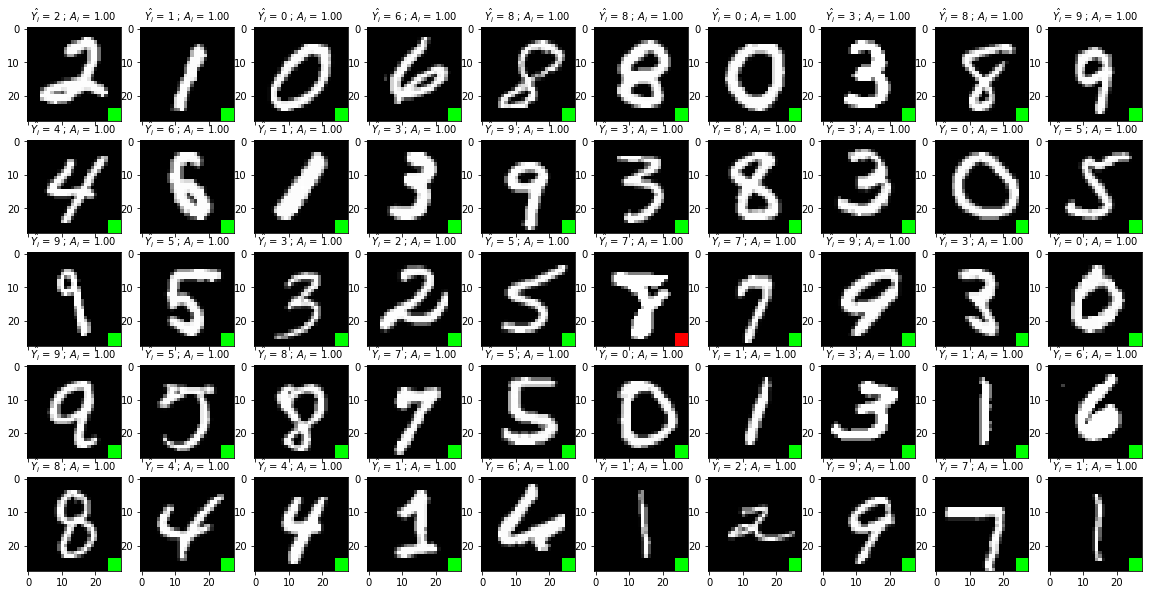

In [53]:
fig, AX = plt.subplots(5, 10, sharex=True)
AX = [b for a in AX for b in a]

prediction_on_test = modelCNN.predict(X_test)

np.random.seed(1234)
for ax in AX:
    index = np.random.randint(Y_test.size)
    # Predict
    A_ = prediction_on_test[index]
    Y_ = np.argmax(A_)
    # Prepare image to show
    img_show = np.ones((N1, N2, 3))
    img_show *= X_test[index]
    # Green square: classified correctly
    # Red square: classified wrongly
    if Y_ == Y_test[index]:
        img_show[-4:, -4:] = (0, 1, 0)
    else:
        img_show[-4:, -4:] = (1, 0, 0)
    ax.imshow(img_show)
    ax.set_title(r'$\hat{Y_i}$ = ' + str(Y_) + r' ; $A_i$ = {:.02f}'.format(float(A_[Y_])), fontsize=10)

In [54]:
print('Validation')
#prediction_on_test = modelCNN.predict(X_test)
print('Test:', np.sum((Y_test_oh - prediction_on_test)**2, axis=1).mean())

prediction_on_train = modelCNN.predict(X_train)
print('Train:', np.sum((Y_train_oh - prediction_on_train)**2, axis=1).mean())

Validation
Test: 0.013752204456713815
Train: 2.4272164423197245e-20


We decreased the number of EPOCHS to 5. As per the above result we could see that training error and testing error  has decreased from 15 EPOCHS. Training error has increased from 10 EPOCHS but the test error has decreased.

**4.Explore alternatives to the default model parameters such as loss, optimizer and metrics. Experiment with the alternatives, report results and interpret them including motivation behind parameter selection.** 

In [49]:
opt = tf.keras.optimizers.RMSprop()
modelCNN.compile(
    loss='binary_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

In [36]:
NUMBER_OF_EPOCHS = 10
modelCNN.fit(X_train, Y_train_oh, epochs=NUMBER_OF_EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0049 - accuracy: 0.9992
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0014 - accuracy: 0.9995
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 9.3673e-04 - accuracy: 0.9995
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 7.0313e-04 - accuracy: 0.9997
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 8.5570e-04 - accuracy: 0.9997
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 7.6992e-04 - accuracy: 0.9997
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 6.5778e-04 - accuracy: 0.9997
Epoch 8/10
1875/1875 [==============================] - 10s 6ms/step - loss: 6.2430e-04 - accuracy: 0.9998
Epoch 9/10
1875/1875 [==============================] - 10s 6ms/step - loss: 4.4195e-04 - accuracy: 0.9999
Epoch 10/10
1875/1875 [======================

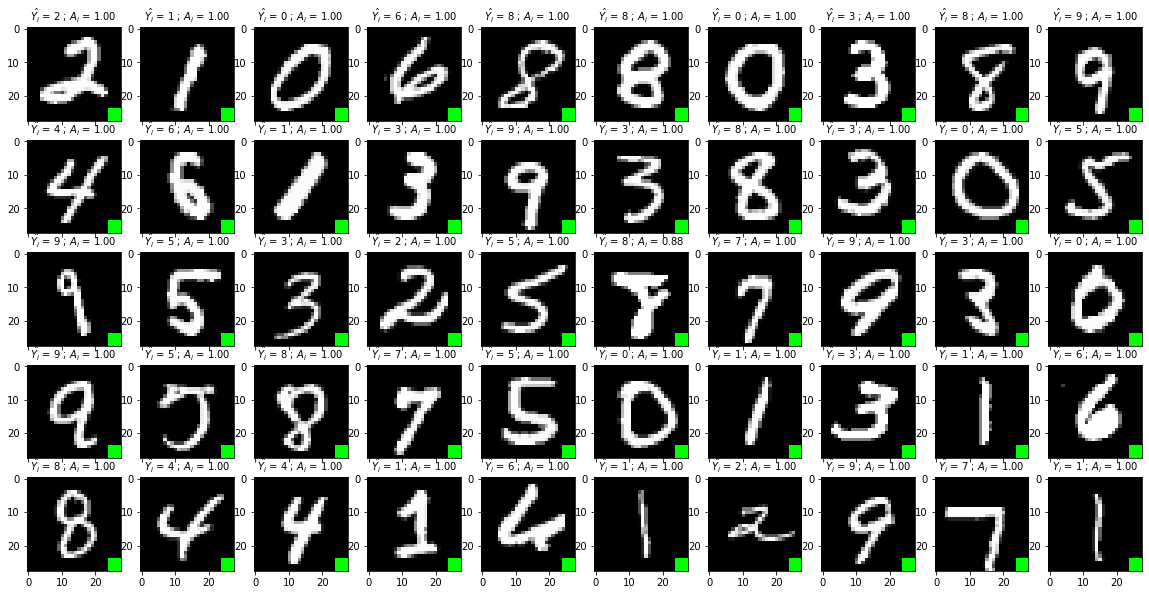

In [37]:
fig, AX = plt.subplots(5, 10, sharex=True)
AX = [b for a in AX for b in a]

prediction_on_test = modelCNN.predict(X_test)

np.random.seed(1234)
for ax in AX:
    index = np.random.randint(Y_test.size)
    # Predict
    A_ = prediction_on_test[index]
    Y_ = np.argmax(A_)
    # Prepare image to show
    img_show = np.ones((N1, N2, 3))
    img_show *= X_test[index]
    # Green square: classified correctly
    # Red square: classified wrongly
    if Y_ == Y_test[index]:
        img_show[-4:, -4:] = (0, 1, 0)
    else:
        img_show[-4:, -4:] = (1, 0, 0)
    ax.imshow(img_show)
    ax.set_title(r'$\hat{Y_i}$ = ' + str(Y_) + r' ; $A_i$ = {:.02f}'.format(float(A_[Y_])), fontsize=10)

In [38]:
print('Validation')
#prediction_on_test = modelCNN.predict(X_test)
print('Test:', np.sum((Y_test_oh - prediction_on_test)**2, axis=1).mean())

prediction_on_train = modelCNN.predict(X_train)
print('Train:', np.sum((Y_train_oh - prediction_on_train)**2, axis=1).mean())

Validation
Test: 0.01303502335241238
Train: 6.856022714752557e-12


I have chose Binary cross entropy loss. It is independent for each vector component (class), meaning that the loss computed for every CNN output vector component is not affected by other component values. Defualt optimizer will be used in the above result. Accuracy metrics calculates how often predictions equal labels. From the above model parameter we found out testing error has decreased by a small change and training error has been minimized to zero.

**5.Bonus task: experiment the hyperparameters of the model, and/or the architecture of the CNN, and report results of the experiments.**

In [41]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.datasets import mnist

In [39]:
def build_model(var_activation='relu',var_optimizer='adam'):
  N1, N2, C = X_train[0].shape
  model = tf.keras.Sequential([
    tf.keras.layers.Input(X_train[0].shape),
    tf.keras.layers.Conv2D(32, 3, activation=var_activation),
    tf.keras.layers.Conv2D(64, 3, activation=var_activation),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(N1*N2, activation=var_activation),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
  ])
  model.compile(
    loss='categorical_crossentropy',
    optimizer=var_optimizer,
    metrics=['accuracy']
  )

  return model

In [40]:
_activations=['tanh','relu','selu']
_optimizers=['sgd','adam']
_batch_size=[16,32,64]
params=dict(var_activation=_activations,
            var_optimizer=_optimizers,
            batch_size=_batch_size)
print(params)

{'var_activation': ['tanh', 'relu', 'selu'], 'var_optimizer': ['sgd', 'adam'], 'batch_size': [16, 32, 64]}


In [43]:
model = KerasClassifier(build_fn=build_model,epochs=4,batch_size=16)

In [46]:
rscv = RandomizedSearchCV(model, param_distributions=params, cv=3,n_iter=2)
rscv_results = rscv.fit(X_train, Y_train_oh)

Epoch 1/4
1250/1250 [==============================] - 6s 4ms/step - loss: 0.4106 - accuracy: 0.8833
Epoch 2/4
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1659 - accuracy: 0.9517
Epoch 3/4
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1400 - accuracy: 0.9612
Epoch 4/4
625/625 [==============================] - 1s 2ms/step - loss: 0.1549 - accuracy: 0.9630
Epoch 1/4
1250/1250 [==============================] - 6s 4ms/step - loss: 0.3988 - accuracy: 0.8858
Epoch 2/4
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1606 - accuracy: 0.9548
Epoch 3/4
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1471 - accuracy: 0.9603
Epoch 4/4
625/625 [==============================] - 1s 2ms/step - loss: 0.1543 - accuracy: 0.9672
Epoch 1/4
1250/1250 [==============================] - 6s 4ms/step - loss: 0.3768 - accuracy: 0.8886
Epoch 2/4
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1583 - accuracy: 0

In [47]:
print('Best score is: {} using {}'.format(rscv_results.best_score_,
rscv_results.best_params_))

Best score is: 0.9869166612625122 using {'var_optimizer': 'adam', 'var_activation': 'relu', 'batch_size': 16}


We have performed hyperparameter tuning on CNN. As per the above result we could see that best score is 0.98 with 'adam' as optimizer, 'relu' and batch size is 16. The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero.

In [1]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('EAI6010_DL_MNIST_classification_AnimeshSrivastava_Week4_WinterA_2021.ipynb')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly&response_type=code

Enter your authorization code:
4/1AY0e-g6-zUBvFweU62vsiAVlImg8R_dr8Sf0mo4K3VWYWiIblTZzwDVWPkg
